# H2O2 Master Protocol PC

- Run protocol
- Perform subsequent signal analysis & fitting
- Save raw data and fitting results

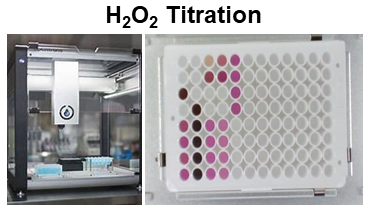

In [1]:
from analysis.analysis_h2o2 import wellsegment_h2o2, plot_titration
from utils.master_h2o2 import protocol_master_h2o2
from fit_functions.fitting_results import readtitration
import os

## Protocol

In [ ]:
# base path to save images
path_cam = '\path\to\your_folder'
# protocol instantiation
protocol = protocol_master_h2o2(path_cam)
# camera settings
frame_interval = 2.5 # seconds
stop = 0.0025 # hrs
sensitivity = 111 
# set realsense camera
protocol.set_realsense(frame_interval = frame_interval, stop = stop, sensitivity = sensitivity)
# init communication & run protocol 
protocol.run()

## Signal Processing
###### params: colour parameter (a* or hue) 
###### vol_step: equal to  the value (tc.dict['transfer_4']['vol'] = 4)

In [ ]:
# extract signal & save raw data
path_cam = '\path\to\your_folder'
# choose the parasmeter to analyze and plot
#params ='a*'
params = 'hue' 
wellsegment_h2o2.analyze_titration(path_cam, params, vol_step = 4)
plot_titration(path_cam, params, vol_step = 4)

## Fitting Analysis
###### params: colour parameter (a* or hue) 
###### boundary: Threshold used to determine transition between linear and polynomial fitting 
###### larger_than_boundary: Boolean, whether the first data point is higher or lower than the boundary
###### linear_first: After seperations of the data points, the first group will use linear fitting

In [ ]:
from fit_functions.fitting_results import readtitration

# save fit results
## pH parameters
path_cam = '\path\to\your_folder'
params = 'hue'
larger_than_boundary =  False
boundary = 50
linear_first = False

# a* parameter
#path_cam = '\path\to\your_folder'
#params = 'a*'
#larger_than_boundary = False
#boundary = 2
#linear_first = True

# wha parameters
#path_cam = '\path\to\your_folder'
#params = 'hue'
#larger_than_boundary =  True
#boundary = 230
#linear_first = False

#rd = readtitration(path_cam, params, larger_than_boundary, boundary).fit("tanh")
rd = readtitration(path_cam, params, larger_than_boundary, linear_first, boundary).fit("biquad")
rd = readtitration(path_cam, params, larger_than_boundary, linear_first, boundary).fit("cubic")

In [ ]:
# skip point to fit
from fit_functions.fitting_results import readtitration
path_cam = r'C:\Users\scrc112\Desktop\work\yuan\16022024-3'
rd = readtitration(path_cam, skip_end_points=[1,6]).fit()
rd = readtitration(path_cam).fit()